# Final Program : Detecting Fake Online Shopping Reviews





# Who am I?

Name: Shiyan Wei

Student ID: 300569298

# Section 1: Introduction And Research Questions

With the COVID breakout, more and more people will use online shopping instead of physical store shopping since it is one of the most effective ways to keep people physically apart and to block the virus from spreading. In most cases, people will check the previous comments before buying online. Reviews are mixed, but some have not come from the actual user and have been made to mislead customers to sell products. To increase sales of their products, some sellers create false customer reviews. However, another incorrect comment was posted by sellers from their competitors in an attempt to reduce their sales. This can lead to distrust in reviews as customers need to find out whether the comments are genuine.  Hence, it is important for customers to identify product reviews before making a purchase, and it is also important for online stores to vet reviews to ensure accuracy and build trust. Using linguistic characters, Python-based methods enable the detection of fake online reviews, allowing us to acquire genuine and useful feedback and avoid purchasing low-quality products.


In this project, I will use NLTK to identify the characteristics of fake comments in linguistics by comparing real and fake reviews. NLTK offers us many suitable methods to detect fake online shopping reviews, such as sentiment analysis, and identifying particular words, phrases, or topics that appear only in fake reviews.  All these methods will enable us to compare the language structure, complexity, and content of the reviews to detect any irregularities that indicate a fake review. Through this research, I aim to understand better the linguistic characteristics that distinguish between fake and real online shopping reviews. Additionally, I can better understand which techniques are more accurate and less effective by exploring how the fake review detection methods used by NLTK perform compared to the manual processes for identifying fake reviews.


# Section 2: Data And Description Of Data

This data set contains both fake and realistic online shopping reviews, with over 40,000 of them being computer-generated. For my research, I will use a sample of the data set consisting of 2,500 reviews between authentic and fake reviews. The dataset is a CSV file downloaded from the OSFHOME website. Four columns were included: category, rating, label, and text. This category contains ten subcategories. They include homes, toys, etc. Furthermore, there is a label distinction between human-made and computer-made text data. In addition, review text data is graded on a scale of 1 to 5. A score of 1 indicates a negative review, while a score of 5 indicates a favourable opinion.  By producing natural language processing and linguistic characters, we are better able to identify fake reviews, as humans and computers have greatly different ways of expressing opinions, thus preserving the honesty of ratings in review text data and selecting credible reviews when online shopping.
(More visualization can go to 4.1.2)

# Section 3: Explanation Of Program

The project considers four key steps of data analysis: data collection, data cleaning, data analysis, and interpreting results and reflection. First, we gather the fake review datasets online and import them using Pandas into the collaboratory. Then, we carry out data cleaning and pre-processing to ensure the accuracy of the analysis. We will use tokenisers, regular expressions, and other techniques to clean the data. After the data cleaning and pre-processing, we build models to classify the reviews as genuine or fake. Following that, we apply natural language processing techniques such as word frequency analysis and sentiment analysis to detect anomalies in the data. Finally, we use different classification algorithms to detect fake reviews and interpret the output to arrive at meaningful conclusions.

# Section 4 : Python Program

**In the following programs, I will use python and NLTK to analyse the real or fake reviews when shopping online. They are:**

*   Data collecting: import a dataset about online shopping items reviews (.csv files)
*   Data cleaning: convert into lowercase, remove punctuation, stop words, and shorten phrases, etc.
*   Data analysis: compare, calculate and analyse data.
*   Data results and reflection: findings, conclusion and discussion from data.



## 4.1 Data Collecting And Cleaning 

### 4.1.1 Data Import

Using pandas to display the csv file.
The generated fake reviews dataset, containing 20k fake reviews and 20k real product reviews. OR = Original reviews (presumably human created and authentic); CG = Computer-generated fake reviews. 

In [146]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# import csv file from github
url = 'https://raw.githubusercontent.com/weishiy/dataset/main/fake%20reviews%20dataset.csv'
df = pd.read_csv(url)
df = pd.DataFrame(df)
df.head() # display the first 5 records in the table

,category,rating,label,text
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [148]:
# Get the column name, data type and other information from the imported file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text      40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [149]:
# Return a tuple representing the dimensionality of the DataFrame.
df.shape

(40432, 4)

In [150]:
# split the text and count the length of sentences
df["sentenceLength"] = df["text"].apply(lambda x: len(x.split(" ")))
df.head()

,category,rating,label,text,sentenceLength
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",14
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",17
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,14
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",18
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,18


### 4.1.2 Display The Values In The Dataset


#### **i	Data Label And Sizes**
This data set contains fake and genuine online shopping reviews, with over 20,000 reviews generated by computers and 20,000 reviews caused by humans combined. Therefore, there will be enough data to distinguish between real and fake reviews, and the results will be more accurate. The data set consists of two labels: OR and CG, where the OR label is for original reviews and the CG label is for computer-generated reviews, and it includes a total of 40,000 reviews.


CG    20216
OR    20216
Name: label, dtype: int64

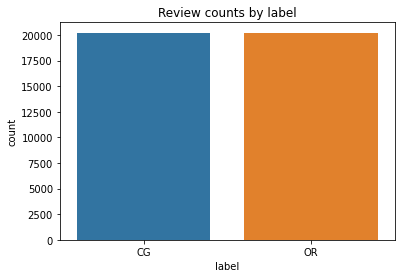

In [151]:
# count by label between CG and OR
sns.countplot(data=df, x="label")
plt.title("Review counts by label")
df.label.value_counts()

#### **ii Data Categories**
There are ten categories, including apparel, sports, and home. Each category has a minimum of 3,500 reviews.


Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: category, dtype: int64

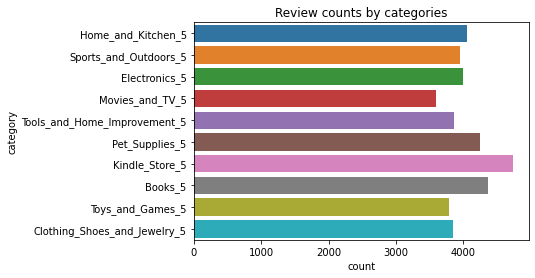

In [152]:
# count by categories
sns.countplot(data=df, y="category")
plt.title("Review counts by categories")
df.category.value_counts()

#### **iii	Data Rating**

Review text data is scored on a scale from 1 to 5. Our data set can view the proportion of different rating levels. A rating of 1 indicates a negative review, while a rating of 5 shows a positive opinion. We can use these ratings to analyse customer sentiment by comparing the distribution of rating levels to determine whether the majority of customers have a favorable or unfavorable opinion.  


5    24559
4     7965
3     3786
1     2155
2     1967
Name: rating, dtype: int64

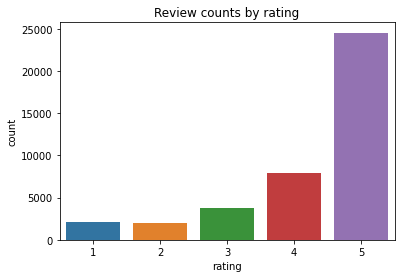

In [153]:
# count by rating
sns.countplot(data=df, x="rating")
plt.title("Review counts by rating")
df.rating.value_counts()

#### **iv Data Type And Length Of Sentences**
In addition, since our data set is a CSV file downloaded from OSFHOME, we sorted the length of reviews within this data set. This classification allowed us to comprehend the length and structure of the customer reviews' sentences. We used Pandas to present the data and sort the evaluation's sentence length. The majority of paragraphs in this collection contain fewer than 50 sentences.


Text(0.5, 1.0, 'Reviews sentence length distribution')

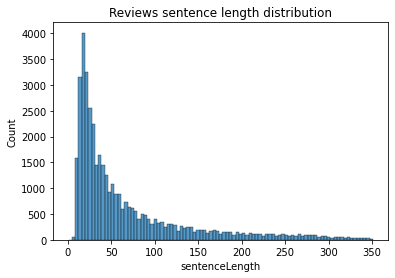

In [154]:
# plot the length of sentence by number of reviews
sns.histplot(data=df, x='sentenceLength')
plt.title("Reviews sentence length distribution")

## 4.2 Data Processing

Before we can do more analysis, we need to clean up our data. NLTK's regular expressions and tokeniser will help us clean up the current data. For example, removing unnecessary punctuation, special characters, extra spaces, and other elements will help to treat each text equally. After removing all these elements, we can also tokeniser the data and apply lemmatisation or stemming to clean up the dataset further. All of these steps, when followed together, can help us create a more efficient dataset.

In [155]:
# import resource 
import nltk, re

from nltk.tokenize import RegexpTokenizer

### 4.2.1 Remove Case Sensitive And Punctuation

Using the following function `print_plot` to print out what things we need to sort out in the original text.  
*   Convert type to string and case sensitive.
*   Remove punctuation and numbers.







In [156]:
def print_plot(index):  
  """print review by index to determine what aspects of data need to be processed"""

  example = df[df.index == index][['text','label']].values[0]  
  if len(example) > 0:  
      print(example[0])  
      print('label:', example[1])  

print_plot(0)

Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty
label: CG


From the above cells, we know the data needs to convert cases and remove numbers.

In [157]:
# convert the text column to string and lowercase
df['text'] = df['text'].str.lower()
df.head() # display the first 5 records in the table

,category,rating,label,text,sentenceLength
0,Home_and_Kitchen_5,5,CG,"love this! well made, sturdy, and very comfor...",14
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. i...",17
2,Home_and_Kitchen_5,5,CG,this pillow saved my back. i love the look and...,14
3,Home_and_Kitchen_5,1,CG,"missing information on how to use it, but it i...",18
4,Home_and_Kitchen_5,5,CG,very nice set. good quality. we have had the s...,18


In [158]:
# remove punctuation and numbers in text column
import string 
df['text'] = df['text'].str.replace('[^\\w\\s]+','', regex = True)
df['text'] = df['text'].str.replace('\\d+','', regex = True)
df.head()

,category,rating,label,text,sentenceLength
0,Home_and_Kitchen_5,5,CG,love this well made sturdy and very comfortab...,14
1,Home_and_Kitchen_5,5,CG,love it a great upgrade from the original ive...,17
2,Home_and_Kitchen_5,5,CG,this pillow saved my back i love the look and ...,14
3,Home_and_Kitchen_5,1,CG,missing information on how to use it but it is...,18
4,Home_and_Kitchen_5,5,CG,very nice set good quality we have had the set...,18


In [159]:
# Check review after code processed
print_plot(0)

love this  well made sturdy and very comfortable  i love itvery pretty
label: CG


### 4.2.2 Text Tokenization

Using NLTK functions to extract the words from text and sentences


In [160]:
# matches any word character (equal to [a-zA-Z0-9_])
regexp2 = RegexpTokenizer('\\w+') 
df['text_token']=df['text'].apply(regexp2.tokenize)
df.head()

,category,rating,label,text,sentenceLength,text_token
0,Home_and_Kitchen_5,5,CG,love this well made sturdy and very comfortab...,14,"[love, this, well, made, sturdy, and, very, co..."
1,Home_and_Kitchen_5,5,CG,love it a great upgrade from the original ive...,17,"[love, it, a, great, upgrade, from, the, origi..."
2,Home_and_Kitchen_5,5,CG,this pillow saved my back i love the look and ...,14,"[this, pillow, saved, my, back, i, love, the, ..."
3,Home_and_Kitchen_5,1,CG,missing information on how to use it but it is...,18,"[missing, information, on, how, to, use, it, b..."
4,Home_and_Kitchen_5,5,CG,very nice set good quality we have had the set...,18,"[very, nice, set, good, quality, we, have, had..."


### 4.2.3 Stopwords

Remove stopwords in text

In [161]:
nltk.download('stopwords')

# Load in and inspect the stopwords resource
from nltk.corpus import stopwords 

# inspect English stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Remove stopwords
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,rating,label,text,sentenceLength,text_token
0,Home_and_Kitchen_5,5,CG,love this well made sturdy and very comfortab...,14,"[love, well, made, sturdy, comfortable, love, ..."
1,Home_and_Kitchen_5,5,CG,love it a great upgrade from the original ive...,17,"[love, great, upgrade, original, ive, mine, co..."
2,Home_and_Kitchen_5,5,CG,this pillow saved my back i love the look and ...,14,"[pillow, saved, back, love, look, feel, pillow]"
3,Home_and_Kitchen_5,1,CG,missing information on how to use it but it is...,18,"[missing, information, use, great, product, pr..."
4,Home_and_Kitchen_5,5,CG,very nice set good quality we have had the set...,18,"[nice, set, good, quality, set, two, months]"


### 4.2.4 Remove Short Words

Remove words under than 2 letters and count the length of text token

In [162]:
# Change `text token` to strings and remove words under 2 letters.
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
# df['text_token_len']  = df['text_token'].str.len()
df.head()

,category,rating,label,text,sentenceLength,text_token,text_string
0,Home_and_Kitchen_5,5,CG,love this well made sturdy and very comfortab...,14,"[love, well, made, sturdy, comfortable, love, ...",love well made sturdy comfortable love itvery ...
1,Home_and_Kitchen_5,5,CG,love it a great upgrade from the original ive...,17,"[love, great, upgrade, original, ive, mine, co...",love great upgrade original ive mine couple years
2,Home_and_Kitchen_5,5,CG,this pillow saved my back i love the look and ...,14,"[pillow, saved, back, love, look, feel, pillow]",pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1,CG,missing information on how to use it but it is...,18,"[missing, information, use, great, product, pr...",missing information use great product price
4,Home_and_Kitchen_5,5,CG,very nice set good quality we have had the set...,18,"[nice, set, good, quality, set, two, months]",nice set good quality set two months


## 4.3  Data Analysis


### 4.3.1 Select A Part Of Data To Analyse


For the final test set, I selected 2,547 reviews with sentence lengths under 50 from the Home and Kitchen category. Since most of the comments are in this range, and this trend is clear from the graphs(4.1.2 - iv Data type and length of sentences) above or check them at the python program, it makes sense to use this data to figure out which statements are honest and which are not.

In [163]:
def buildATable(category,  num2):
  """extract a part of data from specific category ,label and length of reviews"""

  table = df.loc[(df['category'] == category) & (df['sentenceLength'] < num2)]
  newDF = table.copy()
  return newDF

In [164]:
def splitByLabel(table,label):
  """extract data by label"""
  filterByLabel = table.loc[table['label'] == label]
  newtb = filterByLabel.copy()
  return newtb

In [165]:
newTable = buildATable('Home_and_Kitchen_5', 50 )
newTable

,category,rating,label,text,sentenceLength,text_token,text_string
0,Home_and_Kitchen_5,5,CG,love this well made sturdy and very comfortab...,14,"[love, well, made, sturdy, comfortable, love, ...",love well made sturdy comfortable love itvery ...
1,Home_and_Kitchen_5,5,CG,love it a great upgrade from the original ive...,17,"[love, great, upgrade, original, ive, mine, co...",love great upgrade original ive mine couple years
2,Home_and_Kitchen_5,5,CG,this pillow saved my back i love the look and ...,14,"[pillow, saved, back, love, look, feel, pillow]",pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1,CG,missing information on how to use it but it is...,18,"[missing, information, use, great, product, pr...",missing information use great product price
4,Home_and_Kitchen_5,5,CG,very nice set good quality we have had the set...,18,"[nice, set, good, quality, set, two, months]",nice set good quality set two months
...,...,...,...,...,...,...,...
3422,Home_and_Kitchen_5,5,CG,div idvideoblockrtacakjrexv classasection aspa...,17,"[div, idvideoblockrtacakjrexv, classasection, ...",div idvideoblockrtacakjrexv classasection aspa...
3476,Home_and_Kitchen_5,5,CG,calphalon classic nonstick round cordless\n\n...,28,"[calphalon, classic, nonstick, round, cordless...",calphalon classic nonstick round cordless
3611,Home_and_Kitchen_5,3,CG,a datahookproductlinklinked classalinknormal h...,17,"[datahookproductlinklinked, classalinknormal, ...",datahookproductlinklinked classalinknormal hre...
3870,Home_and_Kitchen_5,1,CG,div idvideoblockrixiusdt classasection aspacin...,25,"[div, idvideoblockrixiusdt, classasection, asp...",div idvideoblockrixiusdt classasection aspacin...


In [166]:
newTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2547 entries, 0 to 4010
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        2547 non-null   object
 1   rating          2547 non-null   int64 
 2   label           2547 non-null   object
 3   text            2547 non-null   object
 4   sentenceLength  2547 non-null   int64 
 5   text_token      2547 non-null   object
 6   text_string     2547 non-null   object
dtypes: int64(2), object(5)
memory usage: 159.2+ KB


Text(0.5, 1.0, 'Reviews sentence length distribution')

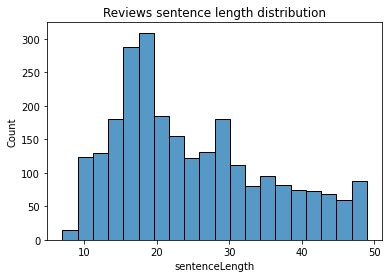

In [167]:
# plot the length of sentence by number of reviews
sns.histplot(data=newTable, x='sentenceLength')
plt.title("Reviews sentence length distribution")

label    CG   OR
rating          
1        80   70
2        55   47
3       109   93
4       183  187
5       907  816


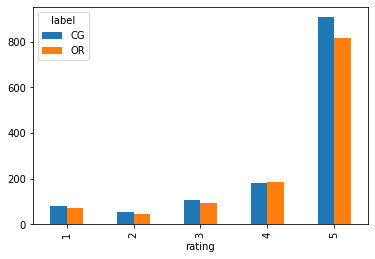

In [168]:
# groub by rating and label in the table
groupsByRating = newTable.groupby(['rating','label']).size().unstack(fill_value=0)
print(groupsByRating)
groupsByRating.plot.bar()

label
CG    1334
OR    1213
dtype: int64


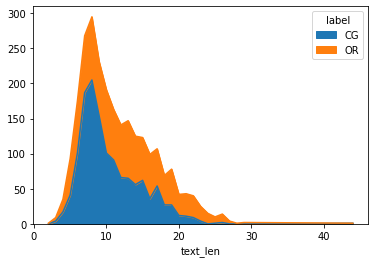

In [169]:
# groub by text_len and label in the table
newTable['text_len'] = newTable['text_token'].apply(len)
groupsByText = newTable.groupby(['text_len','label']).size().unstack(fill_value=0)
# print(groupsBysent)
print(groupsByText.sum()) # total in text length of different labels
groupsByText.plot.area()

### 4.3.2 Lexical Diversity

Using function to compare the lexical diversity between real and fake reviews

In [170]:
def lexical_diversity(table):
    """
    Function to find the lexical diversity of a given input.
    
    :param input: the text to analyse
    :return lexical_diversity: the lexical diversity of the input
    """

    all_words = ' '.join([word for word in table['text_string']])
    all_words_split = all_words.split()
    lexical_diversity = len(set(all_words_split)) / len(all_words_split)
    return lexical_diversity

In [171]:
ORtable = splitByLabel(newTable, 'OR')
CGtable = splitByLabel(newTable, 'CG')

In [172]:
ORlexi = lexical_diversity(ORtable)
ORlexi

0.22953492922836083

In [173]:
CGlexi = lexical_diversity(CGtable)
CGlexi = lexical_diversity(CGtable)


Text(0, 0.5, 'lexical diversity')

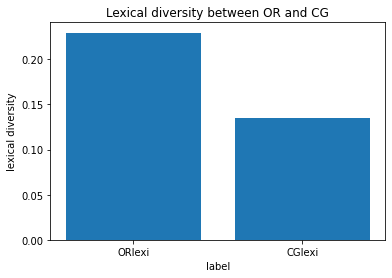

In [174]:
plt.bar(range(2), [ORlexi,CGlexi], tick_label=['ORlexi', 'CGlexi'])
plt.title('Lexical diversity between OR and CG')
plt.xlabel('label') 
plt.ylabel('lexical diversity') 

### 4.3.3 Frequency Distribution

Determine if there is a difference in word frequency between authentic and fake reviews.

In [175]:
ORtable = splitByLabel(newTable, 'OR')
CGtable = splitByLabel(newTable, 'CG')

In [176]:
import nltk
nltk.download('punkt')
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [177]:
# function to plot most frequent terms
def plot_freq_words(x, terms = 30):
  """ plot frequency words """
  
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

 # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(15,3))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

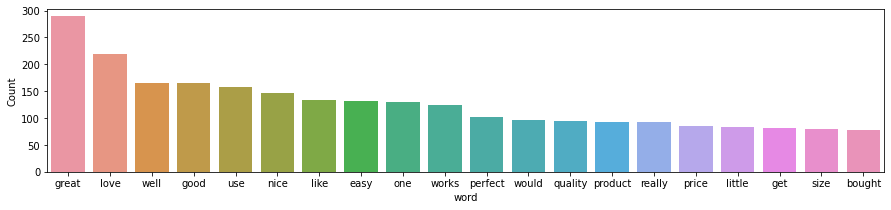

In [178]:
# plot the first 20 frequency words in the OR table (Home_and_Kitchen_5)
plot_freq_words(ORtable['text_string'], 20) 

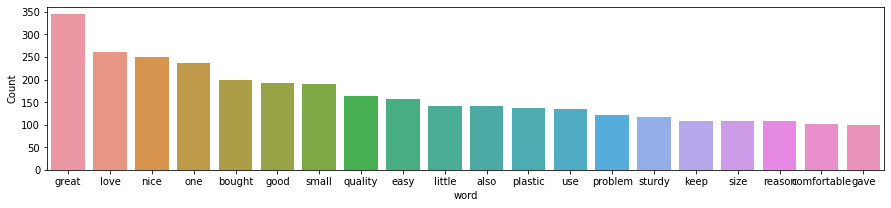

In [179]:
# plot the first 20 frequency words in the CG table (Home_and_Kitchen_5)
plot_freq_words(CGtable['text_string'], 20) 

In [180]:
def find_freqWords(table):
# Create a list of all words
  all_words = ' '.join([word for word in table['text_string']])
# Tokenize all_words
  tokenized_words = nltk.tokenize.word_tokenize(all_words)
  fdist = FreqDist(tokenized_words)
  return fdist

In [181]:
def plot_Top20_Words(fd):
  # Obtain top 10 words
  top_20 = fd.most_common(20)
  # Create pandas series to make plotting easier
  fdist = pd.Series(dict(top_20))
  sns.barplot(y=fdist.index, x=fdist.values, color='blue');
  plt.title("Top 20 commom words")

In [182]:
ORfdist = find_freqWords(ORtable)
print(f'The most 20 words: {ORfdist.most_common(20)}\n')
print(f'Words which only occur once: {sorted(ORfdist.hapaxes())[:20]}\n')
ORfdist.tabulate(20)


The most 20 words: [('great', 289), ('love', 219), ('well', 166), ('good', 165), ('use', 157), ('nice', 147), ('like', 133), ('easy', 131), ('one', 130), ('works', 124), ('perfect', 102), ('would', 97), ('quality', 95), ('product', 93), ('really', 92), ('price', 86), ('little', 83), ('get', 82), ('size', 80), ('bought', 77)]

Words which only occur once: ['abs', 'absorbent', 'absorbs', 'abuse', 'accent', 'accessible', 'accessories', 'accidently', 'accidents', 'accommodate', 'accomplished', 'accuweight', 'activate', 'acts', 'adding', 'additional', 'adhere', 'adjusted', 'admit', 'advent']

  great    love    well    good     use    nice    like    easy     one   works perfect   would quality product  really   price  little     get    size  bought 
    289     219     166     165     157     147     133     131     130     124     102      97      95      93      92      86      83      82      80      77 


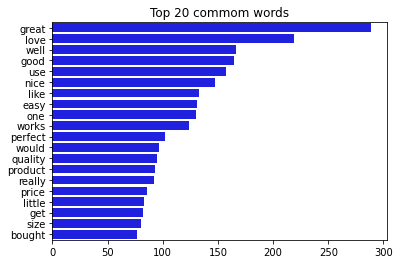

In [183]:
plot_Top20_Words(ORfdist)

In [184]:
CGfdist = find_freqWords(CGtable)
print(f'The most 20 words: {CGfdist.most_common(20)}\n')
print(f'Words which only occur once: {sorted(CGfdist.hapaxes())[:20]}\n')
CGfdist.tabulate(20)

The most 20 words: [('great', 344), ('love', 261), ('nice', 250), ('one', 236), ('bought', 198), ('good', 193), ('small', 190), ('quality', 164), ('easy', 156), ('little', 141), ('also', 141), ('plastic', 136), ('use', 135), ('problem', 122), ('sturdy', 118), ('keep', 109), ('size', 107), ('reason', 107), ('comfortable', 102), ('gave', 100)]

Words which only occur once: ['absolute', 'absorb', 'abused', 'accessories', 'accessory', 'accommodate', 'accustomed', 'acdc', 'acrylic', 'add', 'addiction', 'additional', 'adequately', 'adhesive', 'adore', 'advertisednice', 'againi', 'againvery', 'agree', 'ahead']

      great        love        nice         one      bought        good       small     quality        easy      little        also     plastic         use     problem      sturdy        keep        size      reason comfortable        gave 
        344         261         250         236         198         193         190         164         156         141         141         136    

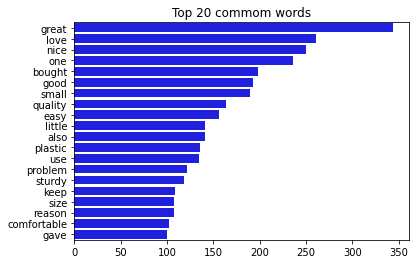

In [185]:
plot_Top20_Words(CGfdist)

### 4.3.4 Search Specific Words

Find the frequency of word which describes a specific household item.

In [186]:
print(ORfdist['knife'])
print(CGfdist['knife'])

10
1


### 4.3.5 Word Cloud

Display the frequency word cloud between real and fake reviews

In [187]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [189]:
import numpy as np
def wordCloud_circle(table): 
  """Display picture of word cloud as circle"""
  all_words_list= ' '.join([word for word in table['text_string']])
  x, y = np.ogrid[:300, :300]
  mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
  mask = 255 * mask.astype(int)

  wc = WordCloud(background_color="white", repeat=True, mask=mask)
  wc.generate(all_words_list)

  plt.axis("off")
  plt.imshow(wc, interpolation="bilinear")

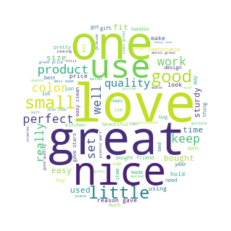

In [190]:
wordCloud_circle(newTable)

In [191]:
def wordCloud_Rect(table):
  """Display picture of word cloud as rectangle"""
  all_words_list= ' '.join([word for word in table['text_string']])
  wc = WordCloud().generate(all_words_list)
  plt.figure(figsize=(10, 7))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

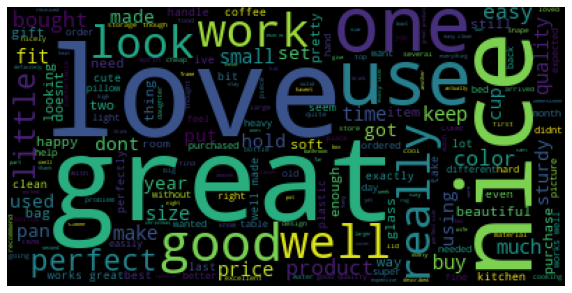

In [192]:
# word cloud for human-created reviews
wordCloud_Rect(ORtable)

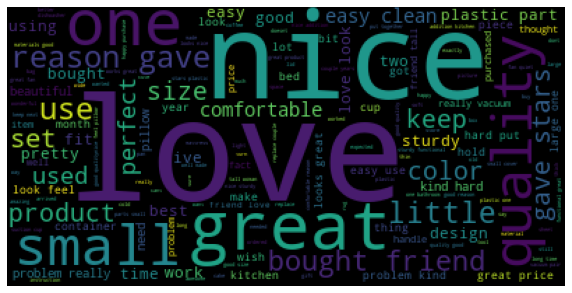

In [193]:
# word cloud for computer-generated reviews
wordCloud_Rect(CGtable)

### 4.3.6 Sentiment Analysis

#### i Sentiment By Rating Of Reviews

In [194]:
def sentiment_rating(table):
  """Whether a text's sentiment relevance is determined by its rating, extract data by its rating"""

  table['sentimentByRating'] = table['rating'].apply(lambda x: 'positive' if (x ==5 or x==4) else 'neutral' if x==3 else 'negative')

  # Visualize data
  sns.countplot(y='sentimentByRating', 
             data=table, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );
  plt.title('sentiment scores in reviews by rating')

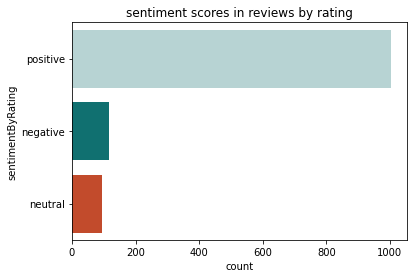

In [195]:
sentiment_rating(ORtable)

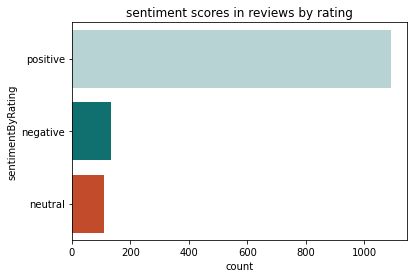

In [196]:
sentiment_rating(CGtable)

#### ii VADER Lexicon
***VADER (Valence Aware Dictionary and sEntiment Reasoner)*** is a social media-aware lexicon and rule-based sentiment analysis tool.

In [197]:
# import resources
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [198]:
def sentiment_scores(table):
 
    # Create a SentimentIntensityAnalyzer object.
    analyzer = SentimentIntensityAnalyzer()
    table['polarity'] = table['text_string'].apply(lambda x: analyzer.polarity_scores(x))

    # Change data structure
    newDF = pd.concat(
    [table.drop(['text', 'sentenceLength', 'text_token', 'text_len','polarity'], axis=1), 
    table['polarity'].apply(pd.Series)], axis=1)

    # Create new variable with sentiment "neutral," "positive" and "negative"
    newDF['sentiment'] = newDF['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

    checkValue = newDF.loc[newDF['compound'].idxmax()].values
    print(f'{checkValue}\n')

    # Visualize data
    sns.countplot(y='sentiment', 
             data=newDF, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );
    plt.title('sentiment scores in reviews')
   

['Home_and_Kitchen_5' 5 'OR'
 'gorgeous cup gorgeous box beginning collect mismatched teacups newest favorite amazing quality pretty arrived perfectly safe amazon shipping happy choice'
 'positive' 0.0 0.265 0.735 0.9842 'positive']



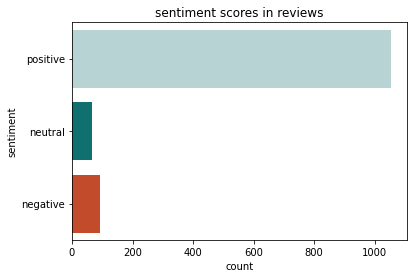

In [199]:
sentiment_scores(ORtable)

['Home_and_Kitchen_5' 4 'CG'
 'looks good affordable price easy assemble easy clean clean pretty quick great price bought work perfectly great fan'
 'positive' 0.0 0.2 0.8 0.9849 'positive']



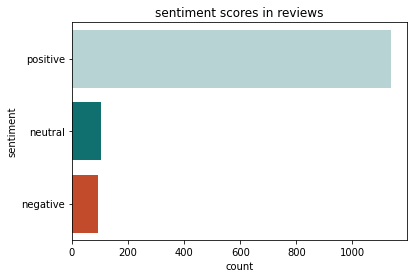

In [200]:
sentiment_scores(CGtable)

['Home_and_Kitchen_5' 4 'CG'
 'looks good affordable price easy assemble easy clean clean pretty quick great price bought work perfectly great fan'
 0.0 0.2 0.8 0.9849 'positive']



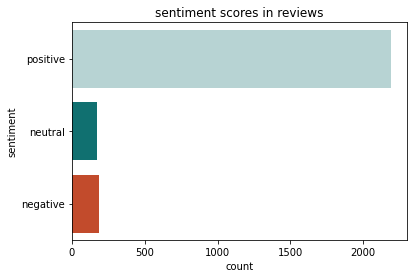

In [201]:
sentiment_scores(newTable)

#### iii Article Length And Polarity

Analyzing the correlation between article length and emotional polarity

Real news has longer article length than fake news.

In [202]:
import plotly.express as px 
fig = px.histogram(newTable, x="text_len", color="label",  
                    marginal="box",  
                    hover_data=newTable.columns, nbins=100)  
fig.update_layout(title_text='Distribution of article length', template="plotly_white")  
fig.show()  
                   

Change data structure for easy reading

In [203]:
newDF = pd.concat(
    [newTable.drop(['text', 'sentenceLength', 'text_token', 'polarity'], axis=1), 
    newTable['polarity'].apply(pd.Series)], axis=1)
newDF.head(3)

,category,rating,label,text_string,text_len,neg,neu,pos,compound
0,Home_and_Kitchen_5,5,CG,love well made sturdy comfortable love itvery ...,8,0.0,0.150,0.850,0.9517
1,Home_and_Kitchen_5,5,CG,love great upgrade original ive mine couple years,8,0.0,0.321,0.679,0.8910
2,Home_and_Kitchen_5,5,CG,pillow saved back love look feel pillow,7,0.0,0.417,0.583,0.7906


In [204]:
# The highest positive sentiment in new dataframe
newDF.loc[newDF['compound'].idxmax()].values

array(['Home_and_Kitchen_5', 4, 'CG',
       'looks good affordable price easy assemble easy clean clean pretty quick great price bought work perfectly great fan',
       18, 0.0, 0.2, 0.8, 0.9849], dtype=object)

In [205]:
# The highest negative sentiment in new dataframe
newDF.loc[newDF['compound'].idxmin()].values

array(['Home_and_Kitchen_5', 1, 'CG',
       'edit seal failed couple years shame one worst experiences ive vacuum plastic part inside fragile difficult clean',
       17, 0.469, 0.433, 0.097, -0.8834], dtype=object)

In [206]:
# polarity by label
import plotly.figure_factory as ff 

x1 = newDF.loc[newDF['label']=='OR']['compound']  
x2 = newDF.loc[newDF['label'] == 'CG']['compound']  
 
group_labels = ['OR', 'CG']  
 
colors = ['rgb(0, 0, 100)', 'rgb(0, 200, 200)']  
 
fig = ff.create_distplot([x1, x2], group_labels,colors=colors)  

fig.update_layout(title_text='polarity', template="plotly_white")  
fig.show()

There are no significant differences by label between sentiment and length of article

In [207]:
# plot differences between sentiment and text length
fig = px.scatter(newDF, x='compound', y='text_len', color='label', template="plotly_white")  
fig.update_layout(title_text='Sentiment polarity')  
fig.show()


### 4.3.7 Bigram

Find the most occurrence phrases with bigram.


In [208]:
from sklearn.feature_extraction.text import CountVectorizer

# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

ORcommon_words = get_top_n_bigram(ORtable['text_string'], 20)
for word, freq in ORcommon_words:
    print(word, freq)



works great 33
well made 30
works well 25
good quality 23
easy use 21
would recommend 20
easy clean 18
perfect size 16
great product 15
looks great 14
good price 14
highly recommend 14
put together 14
work well 14
great quality 13
great price 13
love love 12
easy assemble 11
worked great 11
thought would 10


In [209]:
CGcommon_words = get_top_n_bigram(CGtable['text_string'], 20)
for word, freq in CGcommon_words:
    print(word, freq)

reason gave 97
bought friend 82
gave stars 68
easy clean 56
love look 47
problem really 46
kind hard 42
problem kind 41
great price 41
plastic parts 40
look feel 39
hard put 38
easy use 37
looks great 33
large one 32
really vacuum 31
friend tall 29
sturdy functional 28
stars plastic 28
great product 27


### 4.3.8 Latent Semantic Analysis

#### i Text Lemmatization

To further remove noise from text, we can use lemmatization in the spaCy library. It restores words to their original form and reduces repetition of words

In [210]:
# use fdist dictionary to drops words which occur more than 50 times
allfdist = find_freqWords(CGtable)
CGtable['text_string_fdist'] = CGtable['text_token'].apply(lambda x: ' '.join([item for item in x if allfdist[item] >= 50 ]))
CGtable[['text', 'text_token', 'text_string', 'text_string_fdist']].head()

,text,text_token,text_string,text_string_fdist
0,love this well made sturdy and very comfortab...,"[love, well, made, sturdy, comfortable, love, ...",love well made sturdy comfortable love itvery ...,love well sturdy comfortable love pretty
1,love it a great upgrade from the original ive...,"[love, great, upgrade, original, ive, mine, co...",love great upgrade original ive mine couple years,love great ive couple
2,this pillow saved my back i love the look and ...,"[pillow, saved, back, love, look, feel, pillow]",pillow saved back love look feel pillow,pillow love look feel pillow
3,missing information on how to use it but it is...,"[missing, information, use, great, product, pr...",missing information use great product price,use great product price
4,very nice set good quality we have had the set...,"[nice, set, good, quality, set, two, months]",nice set good quality set two months,nice set good quality set two


In [211]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [212]:
reviews = [r for r in newTable['text_string']]
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['love', 'great', 'upgrade', 'original', 'ive', 'mine', 'couple', 'years']


In [213]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['great', 'upgrade', 'original', 'couple', 'year']


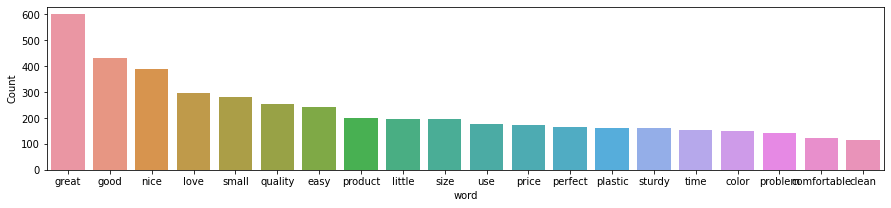

In [214]:
reviews_3 = []
for i in range(len(reviews_2)):
  reviews_3.append(' '.join(reviews_2[i]))

newTable['reviews'] = reviews_3
plot_freq_words(newTable['reviews'], 20) 

#### ii LSA Module

Build a LSA module to analyse the sentiment of reviews

In [215]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(reviews_2) 

doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                                   id2word=dictionary,
                                   num_topics=7, 
                                   random_state=100,
                                   chunksize=1000,
                                   passes=50)
lda_model.print_topics() 

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

[(0,
  '0.040*"good" + 0.034*"great" + 0.030*"friend" + 0.022*"nice" + 0.021*"size" + 0.018*"little" + 0.018*"fan" + 0.016*"happy" + 0.016*"tall" + 0.015*"quality"'),
 (1,
  '0.034*"little" + 0.028*"work" + 0.019*"nice" + 0.018*"time" + 0.017*"instruction" + 0.017*"difficult" + 0.015*"first" + 0.015*"knife" + 0.014*"use" + 0.012*"picture"'),
 (2,
  '0.056*"great" + 0.039*"sturdy" + 0.032*"good" + 0.027*"price" + 0.022*"product" + 0.018*"one" + 0.017*"nice" + 0.016*"perfect" + 0.015*"item" + 0.014*"quality"'),
 (3,
  '0.043*"quality" + 0.041*"nice" + 0.038*"love" + 0.037*"great" + 0.034*"color" + 0.027*"good" + 0.021*"soft" + 0.021*"beautiful" + 0.018*"happy" + 0.018*"pillow"'),
 (4,
  '0.045*"plastic" + 0.036*"cup" + 0.018*"suction" + 0.018*"good" + 0.015*"top" + 0.015*"flimsy" + 0.015*"product" + 0.014*"time" + 0.013*"work" + 0.013*"lid"'),
 (5,
  '0.053*"small" + 0.035*"reason" + 0.031*"star" + 0.024*"size" + 0.023*"bed" + 0.023*"great" + 0.020*"time" + 0.017*"nice" + 0.017*"problem"

In [216]:
# sometime is not working, you should try more times until its work.
!pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [217]:
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models


In [218]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis 

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.151562 -0.086059       1        1  17.417790
5     -0.100461  0.064760       2        1  16.612270
0     -0.163482 -0.023597       3        1  15.700695
6      0.188762 -0.246948       4        1  14.487325
2     -0.039803  0.014576       5        1  14.428509
4      0.129529  0.159083       6        1  11.037387
1      0.137017  0.118185       7        1  10.316024, topic_info=        Term        Freq       Total Category  logprob  loglift
55      easy  212.000000  212.000000  Default  30.0000  30.0000
56       use  156.000000  156.000000  Default  29.0000  29.0000
64   plastic  174.000000  174.000000  Default  28.0000  28.0000
63    reason  104.000000  104.000000  Default  27.0000  27.0000
112    clean  106.000000  106.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
176    large   15.448059  107.330940   Topic7  -4.7859   0.3330
44       one   13.807607   77.664986   Topic7  -4.8982   0.5443
5      great   15.232053  507.209563   Topic7  -4.8000  -1.2341
610      pan   12.350018   37.945043   Topic7  -5.0097   1.1490
376      bit   12.214000   77.956914   Topic7  -5.0208   0.4179

[417 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
890       2  0.900271     alarm
756       2  0.947361    amazon
121       4  0.874761    amount
337       1  0.948412      area
208       4  0.972378  assemble
...     ...       ...       ...
8         1  0.101170      year
8         2  0.294313      year
8         4  0.321905      year
8         6  0.211538      year
8         7  0.064381      year

[539 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 1, 7, 3, 5, 2])

# Section 5 : Data Results And Reflection

*   **Lexical diversity**
Comparing the number of words used in reviews written by humans and computers in the sample dataset shows that human-written reviews have more words than computer-written reviews. The original has a score of 0.225 for lexical diversity, while the version made by a computer only has a score of 0.134

*  **Frequency distribution**
Quality words like "great" and "nice" are among the top 20 most frequent words in both genuine and fake reviews. This indicates that our evaluation texts may contain more positive language.

*   **Word Cloud**
By comparing the frequency words, we can see that the frequency words in both real and fake reviews are very similar and that the word "great" appears frequently. However, words that describe specific household and kitchen items, such as "knife", is rare. This may indicate that computer-generated reviews focus more on general sentiments than detailed descriptions of the product, as they need to be more capable of accurately capturing the product's specific characteristics.

*   **Sentiment Analysis**
  *   Identify the distinctions between rating and sentiment. The graph below shows that most reviews are positive, whether generated by humans or computers.
The rating scale is: 4 or 5 is positive, 3 is neutral, and 1 or 2 is negative.

  *   VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based tool for figuring out the polarity of sentiment in text data.
Using VADER to analyse review sentiment to calculate the polarity score, the sentiment distribution is similar to the previous rating sentiment distribution.  The majority of reviews are positive.
No matter if the reviews are real or not, we can assume that most of the products are good.

  *   When the text length of human-created reviews is compared to that of computer-generated reviews, the text length of human-created reviews is longer. This suggests that when people write reviews, they are more likely to provide details, which could lead to a more accurate product review. However, the trends of sentiment polarity indicate that there is no significant difference between real and fake reviews in terms of sentiment. This implies that the increased detail and length of a human-generated review do not necessarily lead to an increase in polarity, and may indicate that people are more likely to provide more information than computers. This suggests that the additional details provided by human-generated reviews do not necessarily increase the accuracy of reviews, as the sentiment polarity remains the same regardless of the length or details.

*   **Bigram**
Find out which words are often used together by using Bigram to figure out what the data set is about.
Comparing the human-written reviews to those generated by a computer reveals that the original reviews focused more on the product's usability, as there are many possible combinations for phrases such as "works great." On the other hand, computer reviews are more concerned with why the product should be purchased and its appearance. The use collocations less frequently in computer-generated reviews. However, no phrase matches the product description in the home and kitchen category, and genuine and fake reviews may not be related to the product in any category, regardless of whether it is a real or fake review.

*   **Latent Semantic Analysis (LSA)**
By applying text lemmatization to the reviews, it can reduce the noise and identify meaningful relationships among them
LSA (Latent Semantic Analysis) can be used to further analyze the relationships between reviews and product descriptions in the home and kitchen category to find a theme that most closely relates to the product. This method can help identify relationships between reviews and the product in any category, whether real or fake. Topic 2 might, for example, discuss the size of a product, and the word small appears several times.

Using nltk and Python, we discovered that there are linguistic differences between true and false reviews, such as the fact that true reviews have longer texts than fake reviews and that the topics of discussion in true reviews tend to be more specific than those of fake reviews. However, to ensure the accuracy of our results, we still need additional identification documentation. First, we do not know whether there was selection bias in the original data collection for our dataset, and this could have affected our results. Second, it is impossible to determine when the product was reviewed or when the review was generated, which could have a significant impact on the similarity of the review. Third, the test set was chosen based on what I thought I knew, which may have had an effect on the final results. Lastly, we may need to improve some parts of the technology we use. For instance, we can consider conducting additional research on the distinction in sentiment analysis between genuine and fabricated positive reviews. Alternatively, we can compare the similarities between real and fake reviews. This could lead to a better understanding of the differences in sentiment analysis, which could be used to improve our algorithms.